In [30]:
from lib.consensus.consensus import run_consensus
from lib.consensus.consensus_helpers.best_alignment import compute_alignment_score
import os 
from Bio import SeqIO
import os.path as ospath
from Bio import pairwise2
import matplotlib.pyplot as plt

In [31]:
test_name= "Iris_sibirica_test_80_20"
input_folder = ospath.join("data","expedition_jardin_botanique","Iris_sibirica_rbcL_barcode80")
print(ospath.exists(input_folder))
total_time, time_minimap2, time_racon= run_consensus(test_name, ospath.join(input_folder,"Iris_sibiricarbcL_barcode80.fastq"), consensus_method="80_20_longest_sequence", output_dir=ospath.join(os.getcwd(), "output", test_name))

True
Logging set up at /home/ghassan_unix/genorobotics/Lemanic-Hackathon/output/Iris_sibirica_test_80_20/Iris_sibirica_test_80_20_consensus_pipeline_log.log


Minimap2 alignment took 0.50 seconds.
Total Racon iterations took 0.86 seconds.
Total time taken for the consensus pipeline: 1.37 seconds.


In [33]:
ref_seq = SeqIO.read(ospath.join(input_folder,"Iris_sibirica_reference_seq.fasta"), "fasta")
final_consensus_sequence = SeqIO.read(ospath.join(os.getcwd(), "output", "Iris_sibirica_test_80_20","Iris_sibirica_test_80_20_final_consensus.fasta"), "fasta")
top20_consensus_sequence = SeqIO.read(ospath.join(os.getcwd(), "output", "Iris_sibirica_test_80_20", "Iris_sibirica_test_80_20_top20_consensus.fasta"), "fasta")
alignment_final = pairwise2.align.globalxx(ref_seq.seq, final_consensus_sequence.seq, one_alignment_only=True)
alignment_top20 = pairwise2.align.globalxx(ref_seq.seq, top20_consensus_sequence.seq, one_alignment_only=True)
print("final alignment: ", alignment_final[0].score)
print("top20 alignment: ", alignment_top20[0].score)
print(pairwise2.format_alignment(*alignment_final[0]))
print(pairwise2.format_alignment(*alignment_top20[0]))

final alignment:  405.0
top20 alignment:  406.0
CA--AAC------AG---A-G--AC--T----AA---A-G--CA-AG--T-G---TT-G-----G-ATTTA-----AA--GCT---G-GTGTTAAA---GAT-------T--AC--A-G-ATTGACTTA-T-TA-TACTCCTGA-TTA-C-GAA-A---CCAAAGA--T---A--C------TGATA---TCTTGGC-A--G--CA-TTC-CGA-GTA--------ACTCCTCAA-CC--CGGAGTTCC--TG-CCGA-AGAA----GCG----GGG--G--C-TGCGGTAGC-TGCC-G-A--A-T----C-------TTC-----T-ACTG-GTACATGGA-C-----AAC-AGT---G---TGGACTGA-TGGACTTACCA-G-TC-T-----TGA-TCG-TTAC-A-AAG--GACG-ATGCTACC-ACATCGAGGC--CGTTG---TTGGG-GA----GGAA---AATCAATATATTGCTTATGTAGCT--TATCCTTTAGACCTTTT--TG--AAGAGGGT-TCTGTTA--CTA-ACATGTTTACT-----TCCATT-G--TGGG-T-AACGTAT--TTGGTTTCAAAGCCCTACGAGCTCTACG-TCT-GGAAG--A-TC-TGCGAGTTCCTCCTGCTT-ATTCCAAAACTT-TCCAAGGC--C--C-ACCTCATGGCATC-CAGGTTGAA-AG--AGATAA--ATTGAACA--AGT-A--TGGTCG-TCCC-CTAT-TG-G---GA--TGTAC--T--ATTA-A-ACCAAAATTGGGATTATCCGCAAAAAATT---ACGGTAGAGCGGTTTA--T-G--AATGTCT--AC--GCG---GTGGACTTGATTTT-ACA
||  |||      ||   | |  |   |    ||   | |  || ||  | |   || |     | |||||     ||  |||   |

(array([  0.,   0.,   0.,   0.,   0., 658.,   0.,   0.,   0.,   0.]),
 array([211.5, 211.6, 211.7, 211.8, 211.9, 212. , 212.1, 212.2, 212.3,
        212.4, 212.5]),
 <BarContainer object of 10 artists>)

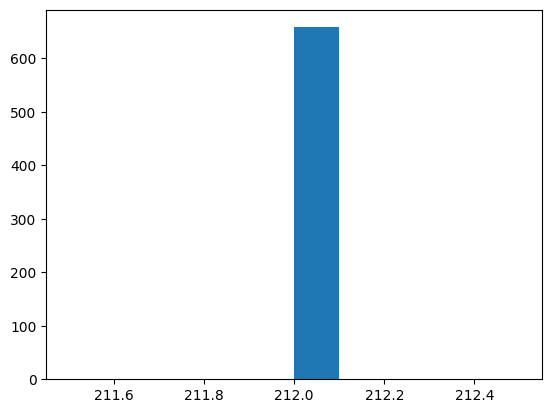

In [11]:
ref_seq = SeqIO.read(ospath.join(input_folder,"Photinia_davidiana_reference_seq.fasta"), "fasta")
consensus_sequences = list(SeqIO.parse(ospath.join("output", test_name, "photinia_davidiana_test_all_final_consensus.fasta"), "fasta"))
list_of_scores=[]
n=0
for seq in consensus_sequences:
    alignments = pairwise2.align.globalxx(ref_seq.seq, consensus_sequences[0].seq, one_alignment_only=True)
    list_of_scores.append(alignments[0].score)
    n+=1
    #if n>=50:
     #   break
plt.hist(list_of_scores)